Câu 1 (2 Điểm): Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:
- Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm)
- Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm)
- Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu 
nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu 
hình mới vào file a_random_color.jpg(0.5 Điểm)
- Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value 
để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, 
a_value.jpg) (0.5 Điểm)

In [ ]:
import cv2
import numpy as np
import random

image = cv2.imread('bird.jpg')

meanfil = cv2.blur(image, (5, 5))
cv2.imwrite('bird_loc_trung_binh.jpg', meanfil)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
anhBienLaplacian = cv2.Laplacian(grayscale, cv2.CV_64F)
anhBien = cv2.convertScaleAbs(anhBienLaplacian)
cv2.imwrite('bird_anh_bien.jpg', anhBien)

heSorandom = [random.uniform(0.5, 1.5) for _ in range(3)]
random.shuffle(heSorandom)

kenhB, kenhG, kenhR = cv2.split(image)
kenhB = np.clip(kenhB * heSorandom[0], 0, 255).astype(np.uint8)
kenhG = np.clip(kenhG * heSorandom[1], 0, 255).astype(np.uint8)
kenhR = np.clip(kenhR * heSorandom[2], 0, 255).astype(np.uint8)

anhrandomcolor = cv2.merge((kenhB, kenhG, kenhR))
cv2.imwrite('bird_random_color.jpg', anhrandomcolor)

anhHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
kenhHue, kenhSaturation, kenhValue = cv2.split(anhHSV)

cv2.imwrite('bird_hue.jpg', kenhHue)
cv2.imwrite('bird_saturation.jpg', kenhSaturation)
cv2.imwrite('bird_value.jpg', kenhValue)



True

Câu 2 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để tạo menu động cho 
phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp 
dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể:
1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau: 
- Image inverse transformation(0.5 Điểm)
- Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) (0.5 Điểm)
- Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) (0.5 Điểm)
- Histogram equalization(0.5 Điểm)
- Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255)
(0.5 Điểm)
- Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) (0.5 Điểm)
2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên image1.jpg, image2.jpg, và 
image3.jpg (0.5 Điểm)
3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng 
trên cả ba ảnh (0.5 Điểm)
- Phím I: Image inverse transformation 
- Phím G: Gamma-Correction 
- Phím L: Log Transformation 
- Phím H: Histogram equalization 
- Phím C: Contrast Stretching 
- Phím A: Adaptive Histogram Equalization
4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định 
dạng output_[phương pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg, 
output_gamma_2.jpg)

Chọn phương pháp xử lý ảnh:
I - Nghịch đảo ảnh
G - Hiệu chỉnh Gamma (gamma ngẫu nhiên từ 0.5 đến 2.0)
L - Biến đổi Log (hệ số c ngẫu nhiên từ 1.0 đến 5.0)
H - Cân bằng Histogram
C - Giãn độ tương phản (min/max ngẫu nhiên từ 0 đến 255)
A - Cân bằng Histogram thích nghi (CLAHE)
Áp dụng hệ số nhân log c = 4.89


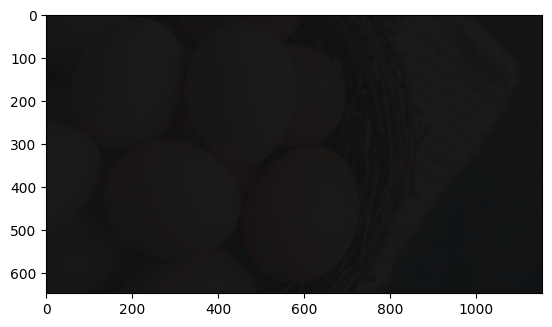

Lưu thành công: ket_qua_log_1.jpg


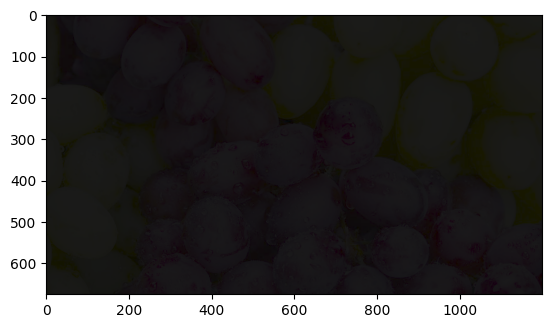

Lưu thành công: ket_qua_log_2.jpg


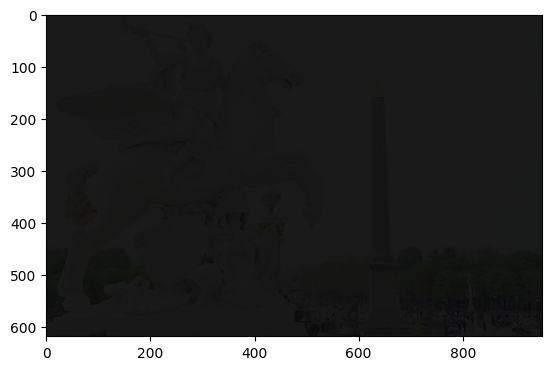

Lưu thành công: ket_qua_log_3.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

danhsachanh = ['egg.jpg', 'grapes.jpg', 'monument.jpg']

for tenanh in danhsachanh:
    if not os.path.exists(tenanh):
        print(f"Không tìm thấy ảnh: {tenanh}")
        exit()

cacanh = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in danhsachanh]

def nghichdao(anh):
    return 255 - anh

def hieuchinhgamma(anh, gamma):
    invgamma = 1.0 / gamma
    bang = np.array([(i / 255.0) ** invgamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(anh, bang)

def biendoiLog(anh, c):
    anhfloat = anh.astype(np.float32)
    anhlog = c * np.log1p(anhfloat)
    anhlog = np.clip(anhlog, 0, 255)
    return anhlog.astype(np.uint8)

def canbangHistogram(anh):
    xam = cv2.cvtColor(anh, cv2.COLOR_RGB2GRAY)
    return cv2.equalizeHist(xam)

def giandoTuongphuong(anh, minval, maxval):
    anhfloat = anh.astype(np.float32)
    ketqua = (anhfloat - minval) * (255 / (maxval - minval))
    ketqua = np.clip(ketqua, 0, 255)
    return ketqua.astype(np.uint8)

def canbangHistogramThichnghi(anh):
    xam = cv2.cvtColor(anh, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(xam)

print("Chọn phương pháp xử lý ảnh:")
print("I - Nghịch đảo ảnh")
print("G - Hiệu chỉnh Gamma (gamma ngẫu nhiên từ 0.5 đến 2.0)")
print("L - Biến đổi Log (hệ số c ngẫu nhiên từ 1.0 đến 5.0)")
print("H - Cân bằng Histogram")
print("C - Giãn độ tương phản (min/max ngẫu nhiên từ 0 đến 255)")
print("A - Cân bằng Histogram thích nghi (CLAHE)")

luachon = input("Nhập lựa chọn của bạn (I / G / L / H / C / A): ").strip().upper()

phuongphap = ""
ketqua = []

if luachon == 'I':
    phuongphap = 'nghichdao'
    ketqua = [nghichdao(anh) for anh in cacanh]

elif luachon == 'G':
    phuongphap = 'gamma'
    gamma = round(random.uniform(0.5, 2.0), 2)
    print(f"Áp dụng Gamma = {gamma}")
    ketqua = [hieuchinhgamma(anh, gamma) for anh in cacanh]

elif luachon == 'L':
    phuongphap = 'log'
    c = round(random.uniform(1.0, 5.0), 2)
    print(f"Áp dụng hệ số nhân log c = {c}")
    ketqua = [biendoiLog(anh, c) for anh in cacanh]

elif luachon == 'H':
    phuongphap = 'hist'
    ketqua = [canbangHistogram(anh) for anh in cacanh]

elif luachon == 'C':
    phuongphap = 'contrast'
    minval = random.randint(0, 100)
    maxval = random.randint(150, 255)
    print(f"Stretching với min = {minval}, max = {maxval}")
    ketqua = [giandoTuongphuong(anh, minval, maxval) for anh in cacanh]

elif luachon == 'A':
    phuongphap = 'clahe'
    ketqua = [canbangHistogramThichnghi(anh) for anh in cacanh]

else:
    print("Lựa chọn không hợp lệ.")
    exit()

for i, anhketqua in enumerate(ketqua):
    if anhketqua.ndim == 2:
        plt.imshow(anhketqua, cmap='gray')
    else:
        plt.imshow(anhketqua)
    plt.show()

    if anhketqua.ndim == 3:
        anhlưu = cv2.cvtColor(anhketqua, cv2.COLOR_RGB2BGR)
    else:
        anhlưu = anhketqua

    tenfile = f"ketqua{phuongphap}{i+1}.jpg"
    cv2.imwrite(tenfile, anhlưu)
    print(f"Lưu thành công: {tenfile}")

Câu 3 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh: 
colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp 
biến đổi và tiền xử lý nâng cao.
- Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều 
rộng và chiều cao. (0.5 Điểm)
- Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm)
- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 
7x7 để làm mịn. (0.5 Điểm)
- Ứng dụng công thức bên dưới...

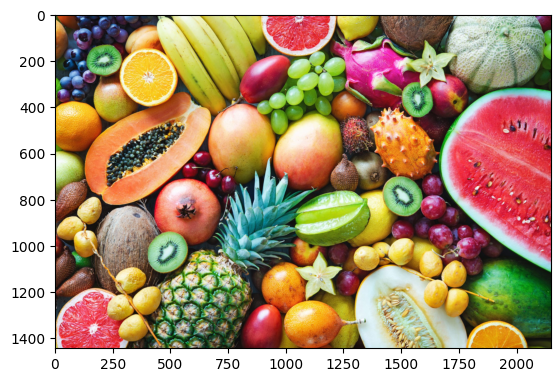

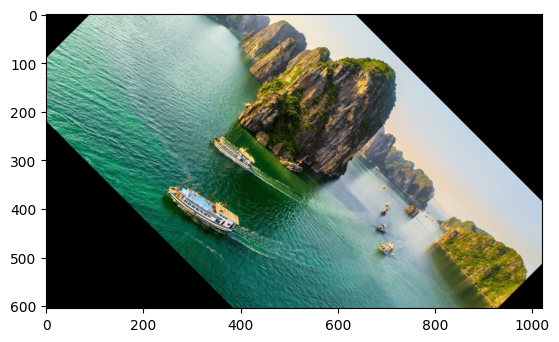

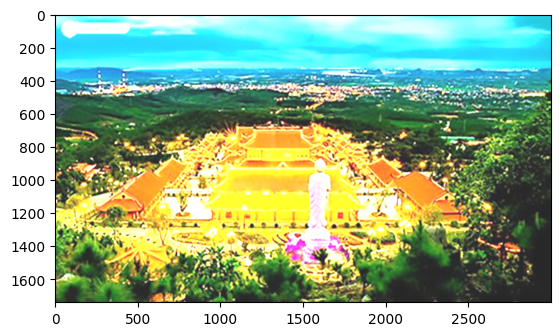

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def showanh(anh, tieuDe="Ket qua"):
    anhRGB = cv2.cvtColor(anh, cv2.COLOR_BGR2RGB)
    plt.imshow(anhRGB)
    plt.show()


image_1 = cv2.imread('colorful-ripe-tropical-fruits.jpg')
if image_1 is not None:
    cao1, rong1 = image_1.shape[:2]
    anh1TangKichThuoc = cv2.resize(image_1, (rong1 + 30, cao1 + 30), interpolation=cv2.INTER_LINEAR)
    showanh(anh1TangKichThuoc)
    cv2.imwrite("image1_tangkichthuoc.jpg", anh1TangKichThuoc)


image2 = cv2.imread('quang_ninh.jpg')
if image2 is not None:
    cao2, rong2 = image2.shape[:2]
    tam = (rong2 // 2, cao2 // 2)
    maTran = cv2.getRotationMatrix2D(tam, 45, 1.0)
    anh2Xoay = cv2.warpAffine(image2, maTran, (rong2, cao2))
    anh2LatNgang = cv2.flip(anh2Xoay, 1)
    showanh(anh2LatNgang)
    cv2.imwrite("anh2_xoay&lat.jpg", anh2LatNgang)


image3 = cv2.imread('pagoda.jpg')
if image3 is not None:
    cao3, rong3 = image3.shape[:2]
    anh3PhongTo = cv2.resize(image3, (rong3 * 5, cao3 * 5), interpolation=cv2.INTER_LINEAR)
    anh3LamMin = cv2.GaussianBlur(anh3PhongTo, (7, 7), 0)

  
    heSoTuongPhan = 1.5
    doLechSang = 40
    anh3ChinhSangTuongPhan = np.clip(heSoTuongPhan * anh3LamMin + doLechSang, 0, 255).astype(np.uint8)

    showanh(anh3ChinhSangTuongPhan)
    cv2.imwrite("anh3_xuly.jpg", anh3ChinhSangTuongPhan)
